In [1]:
import torch
torch.__version__

'1.0.1'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from torch.autograd import Variable


## First Neural Network Using Pytorch

We present our first neural network which learns to map training examples (input array) to targets (output array). 
Lets assume that we work for one of the largest online companies called Wondemovies, which is into serving videos on-demand. Our training dataset contains a feature which represents average hours spent by users watching movies in the platform, we would like to predict how much time each user would spend on the platform in the coming week. Its just a imaginary use case, don't think too much about it. Some of the high level activities for building such a solution are:

1. Data preperation : **get_data()** function prepares the tensors (arrays) containing input and output data.
2. Create learnable parameters : **get_weights()** function provides us with tensors containing random values , which we will optimize to solve our problem.
3. Network Model : **simple_network()** produces the output for the input data applying a linear rule , multiply weights with input data and add the bias term (y = Wx+b).
4. Loss : **loss_fn()** provides information about how good the model is.
5. Optimizer : **optimize()** function helps us in adjusting random weights created initially to help the model calculate target values more accurately.

In [49]:
# Training Data
def get_data():
    train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
    train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
    dtype = torch.FloatTensor
    X = Variable(torch.from_numpy(train_X).type(dtype),requires_grad=False).view(17,1)
    y = Variable(torch.from_numpy(train_Y).type(dtype),requires_grad=False)
    return X,y

def plot_variable(x,y,z='',**kwargs):
    l = []
    for a in [x,y]:
        if type(a) == torch.Tensor:
            l.append(a.data.numpy())
    plt.plot(l[0],l[1],z,**kwargs)

def get_weights():
    w = Variable(torch.randn(1),requires_grad = True)
    b = Variable(torch.randn(1),requires_grad=True)
    return w,b

def simple_network(x):
    y_pred = torch.matmul(x,w)+b
    return y_pred

def loss_fn(y,y_pred):
    loss = (y_pred-y).pow(2).sum()
    for param in [w,b]:
        if not param.grad is None: param.grad.data.zero_()
    loss.backward(retain_graph=True)
    return loss.item()


def optimize(learning_rate):
    w.data -= learning_rate * w.grad.data
    b.data -= learning_rate * b.grad.data

learning_rate = 1e-4

In [50]:
x,y = get_data()               # x - represents training data,y - represents target variables
w,b = get_weights()           # w,b - Learnable parameters
for i in range(500):
    y_pred = simple_network(x) # function which computes wx + b
    loss = loss_fn(y,y_pred)   # calculates sum of the squared differences of y and y_pred
    if i % 50 == 0: 
        print(loss)
    optimize(learning_rate)    # Adjust w,b to minimize the loss

66.3699722290039
8.102563858032227
7.88067626953125
7.667762756347656
7.463461875915527
7.26741886138916
7.07930850982666
6.898802757263184
6.7255988121032715
6.559396743774414


In [51]:
x,y = get_data()  

In [6]:
x, y

(tensor([[ 3.3000],
         [ 4.4000],
         [ 5.5000],
         [ 6.7100],
         [ 6.9300],
         [ 4.1680],
         [ 9.7790],
         [ 6.1820],
         [ 7.5900],
         [ 2.1670],
         [ 7.0420],
         [10.7910],
         [ 5.3130],
         [ 7.9970],
         [ 5.6540],
         [ 9.2700],
         [ 3.1000]]),
 tensor([1.7000, 2.7600, 2.0900, 3.1900, 1.6940, 1.5730, 3.3660, 2.5960, 2.5300,
         1.2210, 2.8270, 3.4650, 1.6500, 2.9040, 2.4200, 2.9400, 1.3000]))

In [52]:
w,b = get_weights()

In [8]:
w, b

(tensor([-1.2306], requires_grad=True), tensor([0.0818], requires_grad=True))

In [53]:
y_pred = simple_network(x) # function which computes wx + b

In [54]:
y_pred

tensor([ -7.2961,  -9.3742, -11.4523, -13.7381, -14.1537,  -8.9359, -19.5359,
        -12.7406, -15.4006,  -5.1557, -14.3653, -21.4477, -11.0990, -16.1694,
        -11.7432, -18.5743,  -6.9183], grad_fn=<AddBackward0>)

In [55]:
loss = loss_fn(y,y_pred)  

In [56]:
loss = (y_pred-y).pow(2).sum()
for param in [w,b]:
    if not param.grad is None: param.grad.data.zero_()
    loss.backward(retain_graph=True)

In [57]:
type(loss)

torch.Tensor

In [58]:
len(x.data.numpy()),len(y_pred),len(y),len(x)

(17, 17, 17, 17)

<class 'torch.Tensor'>
<class 'torch.Tensor'>


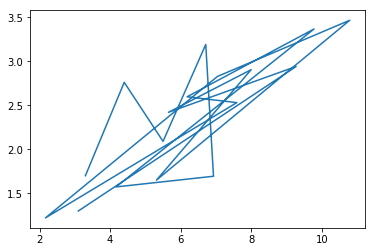

In [48]:
l = []
for a in [X,y]:
    print(type(a))
    if type(a) == torch.Tensor:
        l.append(a.data.numpy())
plt.plot(l[0],l[1])

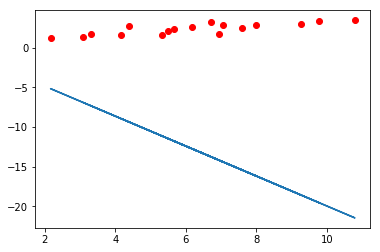

In [61]:
x_numpy = x.data.numpy()
# plot_variable(x=X,y=y,z='ro')
plot_variable(x,y,'ro')
plot_variable(x,y_pred,label='Fitted line')

## Tensor introduction

### Scalar

In [65]:
x = torch.rand(10)
x.size(), x, print(type(x))

<class 'torch.Tensor'>


(torch.Size([10]),
 tensor([0.6525, 0.7238, 0.6849, 0.7329, 0.0767, 0.9528, 0.3521, 0.9205, 0.5033,
         0.2953]),
 None)

### Vector

In [66]:
temp = torch.FloatTensor([23,24,24.5,26,27.2,23.0])
temp.size(),  print(type(temp))

<class 'torch.Tensor'>


(torch.Size([6]), None)

### Matrix

In [67]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [68]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [81]:
boston.data[0:3,:]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00]])

In [82]:
boston_tensor = torch.from_numpy(boston.data)
boston_tensor.size()

torch.Size([506, 13])

In [85]:
boston_tensor[:2]

tensor([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01, 6.5750e+00,
         6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02, 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01, 6.4210e+00,
         7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02, 1.7800e+01, 3.9690e+02,
         9.1400e+00]], dtype=torch.float64)

In [86]:
boston_tensor[:10,:5]

tensor([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01],
        [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01],
        [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01],
        [2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01],
        [8.8290e-02, 1.2500e+01, 7.8700e+00, 0.0000e+00, 5.2400e-01],
        [1.4455e-01, 1.2500e+01, 7.8700e+00, 0.0000e+00, 5.2400e-01],
        [2.1124e-01, 1.2500e+01, 7.8700e+00, 0.0000e+00, 5.2400e-01],
        [1.7004e-01, 1.2500e+01, 7.8700e+00, 0.0000e+00, 5.2400e-01]],
       dtype=torch.float64)

### 3d- tensor

In [89]:
from PIL import Image as im

panda = np.array(im.open('../../../../datasets/sports_images/train/cricket/cr1.jpg').resize((224,224)))
panda_tensor = torch.from_numpy(panda)
panda_tensor.size()

torch.Size([224, 224, 3])

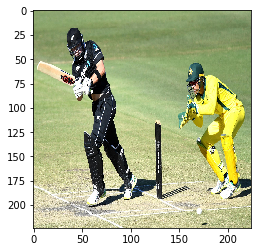

In [90]:
plt.imshow(panda);

### Slicing Tensor

In [91]:
sales = torch.FloatTensor([1000.0,323.2,333.4,444.5,1000.0,323.2,333.4,444.5])

In [93]:
sales[:5]

tensor([1000.0000,  323.2000,  333.4000,  444.5000, 1000.0000])

In [94]:
# 0th element to N-th element, where N is length of array - 5.
sales[:-5]

tensor([1000.0000,  323.2000,  333.4000])

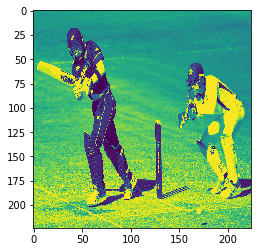

In [95]:
# image without a chanel, ie using 2 out of 3 channels
plt.imshow(panda_tensor[:,:,0].numpy());

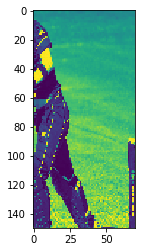

In [96]:
plt.imshow(panda_tensor[25:175,60:130,0].numpy());

### Select specific element of tensor

In [97]:
#torch.eye(shape) produces an diagonal matrix with 1 as it diagonal #elements.
sales = torch.eye(3,3)
sales[0,1]

tensor(0.)

### 4D Tensor

In [ ]:
from glob import glob
#Read cat images from disk
data_path='/Users/vishnu/Documents/fastAIPytorch/fastai/courses/dl1/data/dogscats/train/cats/'
cats = glob(data_path+'*.jpg')
#Convert images into numpy arrays
cat_imgs = np.array([np.array(Image.open(cat).resize((224,224))) for cat in
cats[:64]])
cat_imgs = cat_imgs.reshape(-1,224,224,3)
cat_tensors = torch.from_numpy(cat_imgs)
cat_tensors.size()

### Tensor addition and multiplication

In [99]:
#Various ways you can perform tensor addition
a = torch.rand(2,2) 
b = torch.rand(2,2)
a, b

(tensor([[0.5234, 0.5371],
         [0.1256, 0.5105]]), tensor([[0.3857, 0.4171],
         [0.4532, 0.6461]]))

In [100]:
c = a + b
d = torch.add(a,b)
c, d

(tensor([[0.9091, 0.9543],
         [0.5788, 1.1565]]), tensor([[0.9091, 0.9543],
         [0.5788, 1.1565]]))

In [101]:
#For in-place addition
a.add_(5)

tensor([[5.5234, 5.5371],
        [5.1256, 5.5105]])

In [102]:
#Multiplication of different tensors
a*b, a.mul(b)

(tensor([[2.1306, 2.3098],
         [2.3228, 3.5602]]), tensor([[2.1306, 2.3098],
         [2.3228, 3.5602]]))

In [103]:
a

tensor([[5.5234, 5.5371],
        [5.1256, 5.5105]])

### On GPU

In [106]:
import time

In [107]:
a = torch.rand(10000,10000)
b = torch.rand(10000,10000)

start_time = time.time()
a.matmul(b)
print("--- %s seconds ---" % (time.time() - start_time))
#Time taken : 8.54 s

--- 8.54906177520752 seconds ---


In [108]:
#Move the tensors to GPU
a = a.cuda()
b = b.cuda()

start_time = time.time()
a.matmul(b)
print("--- %s seconds ---" % (time.time() - start_time))
#Time taken : 0.32s  

--- 0.3219571113586426 seconds ---


In [109]:
8.54/0.32

26.687499999999996

GPU made this calculation 26 times faster

### Variables

In [110]:
from torch.autograd import Variable
x = Variable(torch.ones(2,2),requires_grad=True)
y = x.mean()
y.backward()
x.grad

tensor([[0.2500, 0.2500],
        [0.2500, 0.2500]])

In [111]:
x.grad_fn

In [112]:
x.data

tensor([[1., 1.],
        [1., 1.]])

In [113]:
y.grad_fn

### Create data for our neural network

In [114]:
def get_data():
    train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
    train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
    dtype = torch.FloatTensor
    X = Variable(torch.from_numpy(train_X).type(dtype),requires_grad=False).view(17,1)
    y = Variable(torch.from_numpy(train_Y).type(dtype),requires_grad=False)
    return X,y

### Create learnable parameters

In [115]:
def get_weights():
    w = Variable(torch.randn(1),requires_grad = True)
    b = Variable(torch.randn(1),requires_grad=True)
    return w,b

### Implement Neural Network

In [116]:
def simple_network(x):
    y_pred = torch.matmul(x,w)+b
    return y_pred

### Implement Neural Network in Pytorch

In [117]:
import torch.nn as nn
f = nn.Linear(17,1) # Much simpler.
f

Linear(in_features=17, out_features=1, bias=True)

### Implementing Loss Function

In [ ]:
def loss_fn(y,y_pred):
    loss = (y_pred-y).pow(2).sum()
    for param in [w,b]:
        if not param.grad is None: param.grad.data.zero_()
    loss.backward()
    return loss.data[0]

In [ ]:
### Implementing Optimizer

In [ ]:
def optimize(learning_rate):
    w.data -= learning_rate * w.grad.data
    b.data -= learning_rate * b.grad.data

## Loading Data

### Defining Dataset

In [ ]:
from torch.utils.data import Dataset
class DogsAndCatsDataset(Dataset):
    def __init__(self,):
        pass
    def __len__(self):
        pass
    def __getitem__(self,idx):
        pass

In [ ]:
class DogsAndCatsDataset(Dataset):
    def __init__(self,root_dir,size=(224,224)):
        self.files = glob(root_dir)
        self.size = size
    def __len__(self):
        return len(self.files)
    def __getitem__(self,idx):
        img = np.asarray(Image.open(self.files[idx]).resize(self.size))
        label = self.files[idx].split('/')[-2]
        return img,label

### Defining DataLoader to iterate over Dogs and Cats Dataset

In [ ]:
from torch.utils.data import Dataset, DataLoader

dataloader = DataLoader(DogsAndCatsDataset,batch_size=32,num_workers=2)
for imgs , labels in dataloader:
        #Apply your DL on the dataset.
    pass